In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN
from scipy.stats import zscore
from itertools import combinations
from sklearn.metrics import silhouette_score
import os
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.mixture import GaussianMixture
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean

pd.options.display.max_colwidth = 1000

# 폴더 내 CSV 병합

In [7]:
# folder_path1 = '/home/ubuntu/project/4.5HZ/Data/수집/audio_수집_진행/도형  - accoustic, k-pop'
# folder_path2 = '/home/ubuntu/project/4.5HZ/Data/수집/audio_수집_진행/민진  - edm, soul'
# folder_path3 = '/home/ubuntu/project/4.5HZ/Data/수집/audio_수집_진행/세인  - hip-hop, r-n-b'
# folder_path4 = '/home/ubuntu/project/4.5HZ/Data/수집/audio_수집_진행/유진  - pop, rock'
# folder_path5 = '/home/ubuntu/project/4.5HZ/Data/수집/audio_수집_진행/현준  -  romance, dance'

# csv_files1 = [f for f in os.listdir(folder_path1) if f.endswith('.csv')]
# csv_files2 = [f for f in os.listdir(folder_path2) if f.endswith('.csv')]
# csv_files3 = [f for f in os.listdir(folder_path3) if f.endswith('.csv')]
# csv_files4 = [f for f in os.listdir(folder_path4) if f.endswith('.csv')]
# csv_files5 = [f for f in os.listdir(folder_path5) if f.endswith('.csv')]

In [8]:
# dfs1 = []
# for csv_file in csv_files1:
#     file_path1 = os.path.join(folder_path1, csv_file)
#     df1 = pd.read_csv(file_path1)
#     dfs1.append(df1)

# merged_df1 = pd.concat(dfs1, ignore_index=True)
# df1 = merged_df1.drop_duplicates()

# dfs2 = []
# for csv_file in csv_files2:
#     file_path2 = os.path.join(folder_path2, csv_file)
#     df2 = pd.read_csv(file_path2)
#     dfs2.append(df2)

# merged_df2 = pd.concat(dfs2, ignore_index=True)

# df2 = merged_df2.drop_duplicates()

# dfs3 = []
# for csv_file in csv_files3:
#     file_path3 = os.path.join(folder_path3, csv_file)
#     df3 = pd.read_csv(file_path3)
#     dfs3.append(df3)

# merged_df3 = pd.concat(dfs3, ignore_index=True)

# df3 = merged_df3.drop_duplicates()

# dfs4 = []
# for csv_file in csv_files4:
#     file_path4 = os.path.join(folder_path4, csv_file)
#     df4 = pd.read_csv(file_path4)
#     dfs4.append(df4)

# merged_df4 = pd.concat(dfs4, ignore_index=True)

# df4 = merged_df4.drop_duplicates()

# dfs5 = []
# for csv_file in csv_files5:
#     file_path5 = os.path.join(folder_path5, csv_file)
#     df5 = pd.read_csv(file_path5)
#     dfs5.append(df5)

# merged_df5 = pd.concat(dfs5, ignore_index=True)

# df5 = merged_df5.drop_duplicates()

In [9]:
# df_o = pd.concat([df1, df2, df3, df4, df5], ignore_index=True).drop_duplicates()
# df_o.describe()

In [10]:
# df_o.to_csv('/home/ubuntu/project/4.5HZ/추천시스템/콘텐츠기반필터링/audio_contents.csv', index=False)
# df_o = pd.read_csv('audio_contents.csv')

In [2]:
df = pd.read_csv('/home/ubuntu/project/4.5HZ/Data/완성/최종완성_적재_오디오특성(12월20일).csv')
df = df.rename(columns={'TRACK_ID': 'track_id'})

In [3]:
df_col = df.drop(columns=['music_key', 'music_mode', 'time_signature'])
df_col

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_id
0,0.620,0.586,-6.612,0.2120,0.1550,0.000000,0.5350,0.487,137.131,130980,000TJlEJQ3nafsm1hBWpoj
1,0.579,0.761,-5.550,0.0516,0.0975,0.001820,0.2730,0.286,126.163,148095,001op3H5t7sehq5JCG2PvM
2,0.585,0.683,-3.827,0.0523,0.7370,0.000000,0.1140,0.493,128.018,157987,002wiS64p2qXaYYVAP7KOW
3,0.557,0.845,-9.292,0.0466,0.2690,0.859000,0.1300,0.799,111.562,128090,003DYiYPxYSgbtRTXzkcf6
4,0.611,0.399,-11.474,0.0357,0.7220,0.000164,0.2590,0.310,122.880,296267,003iZmWziYecRnqwchpdQf
...,...,...,...,...,...,...,...,...,...,...,...
56890,0.651,0.720,-6.529,0.1610,0.3310,0.413000,0.5280,0.705,90.024,269245,7zy7iE31dGO70ShMXghsfj
56891,0.780,0.858,-6.331,0.1280,0.3570,0.000000,0.0937,0.500,93.984,291002,7zyEA6ntsqPH7sLc1YYK26
56892,0.482,0.865,-4.930,0.1710,0.1100,0.000000,0.0903,0.822,179.792,182350,7zyzK3nsLKF5uTPmHW4PqO
56893,0.549,0.590,-7.498,0.0293,0.7360,0.000188,0.1490,0.485,124.991,268894,7zzPS1pWJShggLI763s9jb


# track 폴더 병합

In [13]:
# dfs=[]
# folder_path = '/home/ubuntu/project/4.5HZ/추천시스템/콘텐츠기반필터링/track_data'
# for file in os.listdir(folder_path):
#     if file.endswith('.csv'):
#         file_path = os.path.join(folder_path, file)
#         try:
#             df = pd.read_csv(file_path, encoding='utf-8')
#             dfs.append(df)
#         except Exception as e:
#             print(f"Error reading file {file}: {e}")
# track_id = pd.concat(dfs, ignore_index=True)
# track_id = track_id.drop_duplicates()

# track_id

,Unnamed: 0,artist_id,artist_name,track_id,track_name,release_date,track_popularity,album_image,genres
0,0,6EPlBSH2RSiettczlz7ihV,Sleepy Hallow,3FjK86616FbluOfTxNK2gY,A N X I E T Y (feat. Doechii),2023-09-15 00:00:00,78,https://i.scdn.co/image/ab67616d00001e02b61bab0113fd666ceab61615,r-n-b
1,1,6EPlBSH2RSiettczlz7ihV,Sleepy Hallow,4wBzWNjUMwQg541J8cAciN,Die Young (feat. 347aidan),2023-09-15 00:00:00,71,https://i.scdn.co/image/ab67616d00001e02b61bab0113fd666ceab61615,r-n-b
2,2,6EPlBSH2RSiettczlz7ihV,Sleepy Hallow,0zopUZ43mcvEFV7Y2zD5ZZ,Good Girls Ain't No Fun,2023-09-15 00:00:00,69,https://i.scdn.co/image/ab67616d00001e02b61bab0113fd666ceab61615,r-n-b
3,3,5Matrg5du62bXwer29cU5T,Benny The Butcher,4EKfEZ89t2DzU41RbsyFC6,Big Dog (with Lil Wayne),2023-11-03 00:00:00,68,https://i.scdn.co/image/ab67616d00001e02cf38c6e683a46ff237bf44d2,r-n-b
4,4,6jGMq4yGs7aQzuGsMgVgZR,Lil Tjay,5ybZcAwqUF7i9gwABLeXzs,2 Grown (feat. The Kid LAROI),2023-07-14 00:00:00,73,https://i.scdn.co/image/ab67616d00001e02eeae1b8f73ed82301ba1c525,r-n-b
...,...,...,...,...,...,...,...,...,...
370962,66488,7zYj9S9SdIunYCfSm7vzAR,JEON SOMI,5XcM0eD1lsWZibqJ9AUTFq,BIRTHDAY,2019-06-13 00:00:00,59,https://i.scdn.co/image/ab67616d00001e02e6c6309b1f1bfaa263188dc6,k-pop
370963,66489,7zYj9S9SdIunYCfSm7vzAR,JEON SOMI,6GwtJzM3yffZ4FJ39QuUcE,Anymore,2021-10-29 00:00:00,57,https://i.scdn.co/image/ab67616d00001e02350ecac91d0f0af55788c648,k-pop
370964,66490,7zYj9S9SdIunYCfSm7vzAR,JEON SOMI,7jzOZuWgZ5gaMet9V5Ix1d,Fast Forward,2023-08-07 00:00:00,73,https://i.scdn.co/image/ab67616d00001e027da22ba88dfc26a18122ee2d,pop
370965,66491,7zyObVag8rUjItn71SkIrh,Survive Said The Prophet,4MTgIH5OZQHAbdBWgbKSAb,MUKANJYO,2019-08-02 00:00:00,65,https://i.scdn.co/image/ab67616d00001e0266692ec3a0f5437132315850,pop


In [36]:
df_track = pd.read_csv('/home/ubuntu/project/4.5HZ/Data/완성/최종완성_적재_트랙(12월20일).csv')

In [37]:
merged_df = pd.merge(df_col, df_track, on='track_id', how='inner')
merged_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_id,artist_name,track_name,release_date,track_popularity,track_picture_url,genres,ARTIST_ID
0,0.620,0.586,-6.612,0.2120,0.1550,0.000000,0.5350,0.487,137.131,130980,000TJlEJQ3nafsm1hBWpoj,"Tyler, The Creator",LEMONHEAD (feat. 42 Dugg),2023-03-31,59,https://i.scdn.co/image/ab67616d00001e02aa95a399fd30fbb4f6f59fca,hip-hop,4V8LLVI7PbaPR0K2TGSxFF
1,0.579,0.761,-5.550,0.0516,0.0975,0.001820,0.2730,0.286,126.163,148095,001op3H5t7sehq5JCG2PvM,Armin van Buuren,One More Time,2023-03-30,52,https://i.scdn.co/image/ab67616d00001e02961a402a592d0c2b7dd820e8,edm,0SfsnGyD8FpIN4U4WCkBZ5
2,0.585,0.683,-3.827,0.0523,0.7370,0.000000,0.1140,0.493,128.018,157987,002wiS64p2qXaYYVAP7KOW,TAEYEON,Set Myself On Fire,2022-02-14,52,https://i.scdn.co/image/ab67616d00001e02034c3a8ba89c6a5ecfda3175,k-pop,3qNVuliS40BLgXGxhdBdqu
3,0.557,0.845,-9.292,0.0466,0.2690,0.859000,0.1300,0.799,111.562,128090,003DYiYPxYSgbtRTXzkcf6,Ghost Funk Orchestra,Brownout,2022-08-12,40,https://i.scdn.co/image/ab67616d00001e02acef63e0da0e41968af47981,soul,5gZWu16OAMVGmfLFNj0NCT
4,0.611,0.399,-11.474,0.0357,0.7220,0.000164,0.2590,0.310,122.880,296267,003iZmWziYecRnqwchpdQf,Rollercoaster,Her Story,2002-03-22,5,https://i.scdn.co/image/ab67616d00001e02bb3668e7952a160bfbeeed64,k-pop,6znlp6eyARykI2zjw8HSxM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56890,0.651,0.720,-6.529,0.1610,0.3310,0.413000,0.5280,0.705,90.024,269245,7zy7iE31dGO70ShMXghsfj,Lil Yachty,running out of time,2023-01-27,62,https://i.scdn.co/image/ab67616d00001e026f578b21bce56056473da7e6,hip-hop,6icQOAFXDZKsumw3YXyusw
56891,0.780,0.858,-6.331,0.1280,0.3570,0.000000,0.0937,0.500,93.984,291002,7zyEA6ntsqPH7sLc1YYK26,Epik High,HOME IS FAR AWAY,2017-10-23,50,https://i.scdn.co/image/ab67616d00001e02a12b80c916f8346de32d2ee4,k-pop,5snNHNlYT2UrtZo5HCJkiw
56892,0.482,0.865,-4.930,0.1710,0.1100,0.000000,0.0903,0.822,179.792,182350,7zyzK3nsLKF5uTPmHW4PqO,Mac Powell,Jesus Christ Is Born,2021-11-05,41,https://i.scdn.co/image/ab67616d00001e0250e2f3c913360cd2bc999ffe,rock,5X77nNxT45eR0OshjmAvKa
56893,0.549,0.590,-7.498,0.0293,0.7360,0.000188,0.1490,0.485,124.991,268894,7zzPS1pWJShggLI763s9jb,Hozan Dino,Nece Dur,2010-09-04,38,https://i.scdn.co/image/ab67616d00001e02e0691c5493161cd723ca1523,k-pop,1K3mSN1InjiGRqyakmLz5H


In [38]:
df = merged_df
df = df.drop_duplicates()
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_id,artist_name,track_name,release_date,track_popularity,track_picture_url,genres,ARTIST_ID
0,0.620,0.586,-6.612,0.2120,0.1550,0.000000,0.5350,0.487,137.131,130980,000TJlEJQ3nafsm1hBWpoj,"Tyler, The Creator",LEMONHEAD (feat. 42 Dugg),2023-03-31,59,https://i.scdn.co/image/ab67616d00001e02aa95a399fd30fbb4f6f59fca,hip-hop,4V8LLVI7PbaPR0K2TGSxFF
1,0.579,0.761,-5.550,0.0516,0.0975,0.001820,0.2730,0.286,126.163,148095,001op3H5t7sehq5JCG2PvM,Armin van Buuren,One More Time,2023-03-30,52,https://i.scdn.co/image/ab67616d00001e02961a402a592d0c2b7dd820e8,edm,0SfsnGyD8FpIN4U4WCkBZ5
2,0.585,0.683,-3.827,0.0523,0.7370,0.000000,0.1140,0.493,128.018,157987,002wiS64p2qXaYYVAP7KOW,TAEYEON,Set Myself On Fire,2022-02-14,52,https://i.scdn.co/image/ab67616d00001e02034c3a8ba89c6a5ecfda3175,k-pop,3qNVuliS40BLgXGxhdBdqu
3,0.557,0.845,-9.292,0.0466,0.2690,0.859000,0.1300,0.799,111.562,128090,003DYiYPxYSgbtRTXzkcf6,Ghost Funk Orchestra,Brownout,2022-08-12,40,https://i.scdn.co/image/ab67616d00001e02acef63e0da0e41968af47981,soul,5gZWu16OAMVGmfLFNj0NCT
4,0.611,0.399,-11.474,0.0357,0.7220,0.000164,0.2590,0.310,122.880,296267,003iZmWziYecRnqwchpdQf,Rollercoaster,Her Story,2002-03-22,5,https://i.scdn.co/image/ab67616d00001e02bb3668e7952a160bfbeeed64,k-pop,6znlp6eyARykI2zjw8HSxM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56890,0.651,0.720,-6.529,0.1610,0.3310,0.413000,0.5280,0.705,90.024,269245,7zy7iE31dGO70ShMXghsfj,Lil Yachty,running out of time,2023-01-27,62,https://i.scdn.co/image/ab67616d00001e026f578b21bce56056473da7e6,hip-hop,6icQOAFXDZKsumw3YXyusw
56891,0.780,0.858,-6.331,0.1280,0.3570,0.000000,0.0937,0.500,93.984,291002,7zyEA6ntsqPH7sLc1YYK26,Epik High,HOME IS FAR AWAY,2017-10-23,50,https://i.scdn.co/image/ab67616d00001e02a12b80c916f8346de32d2ee4,k-pop,5snNHNlYT2UrtZo5HCJkiw
56892,0.482,0.865,-4.930,0.1710,0.1100,0.000000,0.0903,0.822,179.792,182350,7zyzK3nsLKF5uTPmHW4PqO,Mac Powell,Jesus Christ Is Born,2021-11-05,41,https://i.scdn.co/image/ab67616d00001e0250e2f3c913360cd2bc999ffe,rock,5X77nNxT45eR0OshjmAvKa
56893,0.549,0.590,-7.498,0.0293,0.7360,0.000188,0.1490,0.485,124.991,268894,7zzPS1pWJShggLI763s9jb,Hozan Dino,Nece Dur,2010-09-04,38,https://i.scdn.co/image/ab67616d00001e02e0691c5493161cd723ca1523,k-pop,1K3mSN1InjiGRqyakmLz5H


In [39]:
df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_popularity
count,56895.000000,56895.000000,56895.000000,56895.000000,56895.000000,56895.000000,56895.000000,56895.000000,56895.000000,5.689500e+04,56895.000000
mean,0.612620,0.629761,-7.086400,0.091620,0.313743,0.072453,0.190691,0.495112,120.863352,2.111280e+05,38.695263
std,0.150538,0.223793,3.643767,0.096836,0.315386,0.216725,0.151635,0.233977,28.586690,7.070177e+04,19.763356
min,0.000000,0.001530,-35.987000,0.000000,0.000000,0.000000,0.011300,0.000000,0.000000,2.650700e+04,0.000000
25%,0.513000,0.478000,-8.667000,0.036200,0.040500,0.000000,0.099300,0.308000,98.475000,1.762930e+05,25.000000
50%,0.625000,0.662000,-6.315000,0.051300,0.187000,0.000002,0.128000,0.489000,120.386000,2.052630e+05,40.000000
75%,0.723000,0.812000,-4.621000,0.098100,0.552000,0.000851,0.242000,0.679000,139.702000,2.372000e+05,53.000000
max,0.979000,1.000000,2.383000,0.966000,0.996000,0.986000,0.993000,0.990000,229.829000,3.784176e+06,100.000000


In [40]:
df_eda1 = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
df_eda1.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,56895.000000,56895.000000,56895.000000,56895.000000,56895.000000,56895.000000,56895.000000,56895.000000,56895.000000,5.689500e+04
mean,0.612620,0.629761,-7.086400,0.091620,0.313743,0.072453,0.190691,0.495112,120.863352,2.111280e+05
std,0.150538,0.223793,3.643767,0.096836,0.315386,0.216725,0.151635,0.233977,28.586690,7.070177e+04
min,0.000000,0.001530,-35.987000,0.000000,0.000000,0.000000,0.011300,0.000000,0.000000,2.650700e+04
25%,0.513000,0.478000,-8.667000,0.036200,0.040500,0.000000,0.099300,0.308000,98.475000,1.762930e+05
50%,0.625000,0.662000,-6.315000,0.051300,0.187000,0.000002,0.128000,0.489000,120.386000,2.052630e+05
75%,0.723000,0.812000,-4.621000,0.098100,0.552000,0.000851,0.242000,0.679000,139.702000,2.372000e+05
max,0.979000,1.000000,2.383000,0.966000,0.996000,0.986000,0.993000,0.990000,229.829000,3.784176e+06


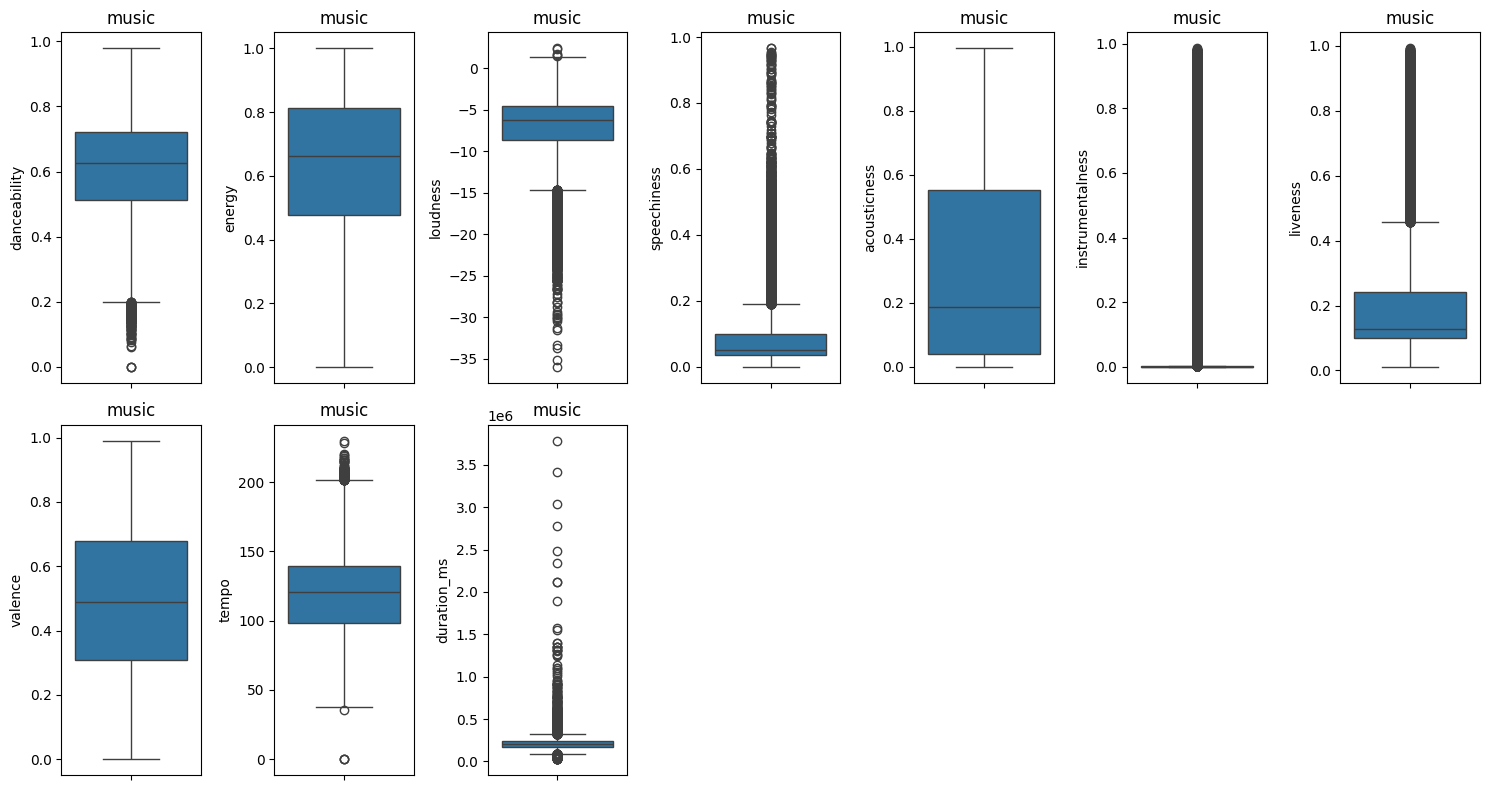

In [41]:
plt.figure(figsize=(15, 8))
for i, feature in enumerate(df_eda1.columns):
    plt.subplot(2, 7, i + 1)
    sns.boxplot(y=df_eda1[feature])
    plt.title('music')

plt.tight_layout()    
plt.show()

In [ ]:
# .sort_values(by='tempo', ascending=False)

In [174]:
df_gmm1 = df_eda1

In [175]:
df_gmm1.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,pca_x,pca_y,GMM_cluster
count,56895.000000,56895.000000,56895.000000,56895.000000,56895.000000,56895.000000,56895.000000,56895.000000,56895.000000,5.689500e+04,5.689500e+04,5.689500e+04,56895.000000
mean,0.612620,0.629761,-7.086400,0.091620,0.313743,0.072453,0.190691,0.495112,120.863352,2.111280e+05,-9.866047e-18,2.385335e-17,2.558432
std,0.150538,0.223793,3.643767,0.096836,0.315386,0.216725,0.151635,0.233977,28.586690,7.070177e+04,1.722644e+00,1.167182e+00,1.390497
min,0.000000,0.001530,-35.987000,0.000000,0.000000,0.000000,0.011300,0.000000,0.000000,2.650700e+04,-3.574421e+00,-5.341978e+00,0.000000
25%,0.513000,0.478000,-8.667000,0.036200,0.040500,0.000000,0.099300,0.308000,98.475000,1.762930e+05,-1.275903e+00,-7.532076e-01,2.000000
50%,0.625000,0.662000,-6.315000,0.051300,0.187000,0.000002,0.128000,0.489000,120.386000,2.052630e+05,-4.200275e-01,-4.093754e-02,3.000000
75%,0.723000,0.812000,-4.621000,0.098100,0.552000,0.000851,0.242000,0.679000,139.702000,2.372000e+05,9.307559e-01,7.255347e-01,3.000000
max,0.979000,1.000000,2.383000,0.966000,0.996000,0.986000,0.993000,0.990000,229.829000,3.784176e+06,7.944847e+00,2.474979e+01,5.000000


In [176]:
df_gmm1 = df_gmm1.drop(df_gmm1[df_gmm1['loudness'] < df_gmm1['loudness'].quantile(0.001)].index)

In [177]:
df_gmm1 = df_gmm1.drop(df_gmm1[df_gmm1['tempo'] == 0].index)

In [170]:
# df_gmm1 = df_gmm1.drop(df_gmm1[(df_gmm1['tempo'] > df_gmm1['tempo'].quantile(0.99)) & (df_gmm1['instrumentalness'] > df_gmm1['instrumentalness'].quantile(0.95))].index)

/tmp/ipykernel_2761/1645746289.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gmm['pca_x'] = df_pca[:, 0]
/tmp/ipykernel_2761/1645746289.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gmm['pca_y'] = df_pca[:, 1]
/tmp/ipykernel_2761/1645746289.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

GMM_cluster
5    16454
4    13803
1     8885
0     6292
2     5853
3     5548
Name: count, dtype: int64
0.1820917164598104


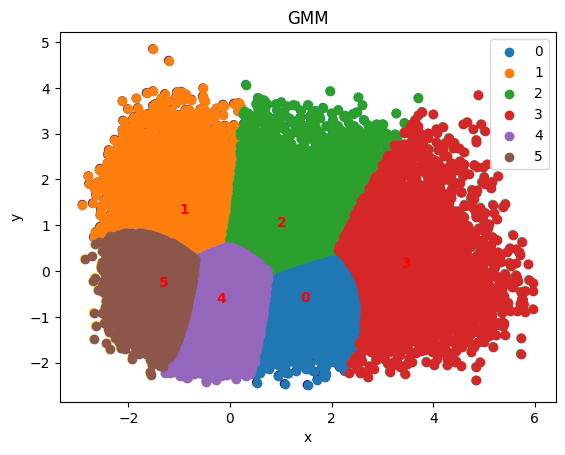

In [188]:
#=========================#
df_gmm = df_gmm1[['danceability', 'energy', 'loudness', 'acousticness', 'tempo']]
#=========================#
n = 6
#=========================#

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_gmm)

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

gmm = GaussianMixture(n_components=n, random_state=42)
gmm.fit(df_pca)

df_gmm['pca_x'] = df_pca[:, 0]
df_gmm['pca_y'] = df_pca[:, 1]
df_gmm['GMM_cluster'] = gmm.predict(df_pca)

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=gmm.predict(df_pca), cmap='viridis')
    
cluster_counts = df_gmm['GMM_cluster'].value_counts()
print(cluster_counts)

# 마커 클러스터 표시
for cluster in range(n):
    cluster_points = df_gmm[df_gmm['GMM_cluster'] == cluster]
    plt.scatter(cluster_points['pca_x'], cluster_points['pca_y'], label=str(cluster), cmap='viridis')
    centroid = gmm.means_[cluster]
    plt.annotate(str(cluster), (centroid[0], centroid[1]), fontsize=10, fontweight='bold', color='red')

score = silhouette_score(df_scaled, gmm.predict(df_pca))
print(score)
plt.title('GMM')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [191]:
df_gmm[df_gmm['pca_y'] > 3.5]

,danceability,energy,loudness,acousticness,tempo,pca_x,pca_y,GMM_cluster
145,0.2320,0.881,-4.723,0.14600,203.390,-1.045033,3.911211,1
257,0.3250,0.772,-6.779,0.61700,209.236,0.172566,3.664105,1
657,0.2620,0.456,-6.451,0.58400,204.091,1.006901,3.691044,2
1423,0.0623,0.990,-3.888,0.12000,201.679,-1.206103,4.598459,1
1583,0.2470,0.508,-6.710,0.42900,201.841,0.683033,3.694304,2
...,...,...,...,...,...,...,...,...
48599,0.2500,0.531,-8.402,0.63600,199.817,1.241197,3.627115,2
52064,0.2020,0.742,-5.290,0.00169,194.876,-0.758370,3.746078,1
52341,0.4580,0.738,-4.383,0.03510,229.829,-1.421565,3.666401,1
56372,0.1740,0.717,-4.741,0.11500,191.988,-0.523462,3.786547,1


# GMM

/tmp/ipykernel_66188/2725422693.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gmm['pca_x'] = df_pca[:, 0]
/tmp/ipykernel_66188/2725422693.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gmm['pca_y'] = df_pca[:, 1]
/tmp/ipykernel_66188/2725422693.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

GMM_cluster
4    22419
1    11551
3    10114
2     7396
0     6619
5     4108
Name: count, dtype: int64
0.23326490637015904


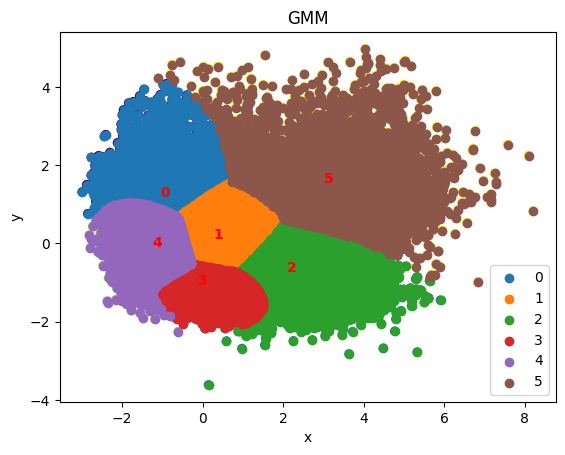

In [253]:
# 1차

# columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

#=========================#
df_gmm = df_eda1[['energy', 'loudness', 'instrumentalness', 'acousticness', 'tempo']]
#=========================#
n = 6
#=========================#

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_gmm)

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

gmm = GaussianMixture(n_components=n, random_state=42)
gmm.fit(df_pca)

cluster_labels = gmm.predict(df_pca)

df_gmm['pca_x'] = df_pca[:, 0]
df_gmm['pca_y'] = df_pca[:, 1]
df_gmm['GMM_cluster'] = cluster_labels

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis')

# 마커 클러스터 표시
for cluster in range(n):
    cluster_points = df_gmm[df_gmm['GMM_cluster'] == cluster]
    plt.scatter(cluster_points['pca_x'], cluster_points['pca_y'], label=str(cluster), cmap='viridis')
    centroid = gmm.means_[cluster]
    plt.annotate(str(cluster), (centroid[0], centroid[1]), fontsize=10, fontweight='bold', color='red')
    
cluster_counts = df_gmm['GMM_cluster'].value_counts()
print(cluster_counts)

score = silhouette_score(df_scaled, cluster_labels)
print(score)
plt.title('GMM')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [254]:
df_gmm[df_gmm['pca_x'] > 7].count()

energy              10
loudness            10
instrumentalness    10
acousticness        10
tempo               10
pca_x               10
pca_y               10
GMM_cluster         10
dtype: int64

In [255]:
df_gmm[df_gmm['pca_y'] > 4.5].count()

energy              19
loudness            19
instrumentalness    19
acousticness        19
tempo               19
pca_x               19
pca_y               19
GMM_cluster         19
dtype: int64

In [256]:
df_gmm[df_gmm['pca_y'] < -2.5].count()

energy              6
loudness            6
instrumentalness    6
acousticness        6
tempo               6
pca_x               6
pca_y               6
GMM_cluster         6
dtype: int64

In [257]:
# 이상치 제거
df_gmm_eda = df_gmm.drop(df_gmm[df_gmm['pca_x'] > 7].index)
df_gmm_eda = df_gmm_eda.drop(df_gmm_eda[df_gmm_eda['pca_y'] > 4.5].index)
df_gmm_eda = df_gmm_eda.drop(df_gmm_eda[df_gmm_eda['pca_y'] < -2.5].index)

/tmp/ipykernel_66188/104490459.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gmm['pca_x'] = df_pca[:, 0]
/tmp/ipykernel_66188/104490459.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gmm['pca_y'] = df_pca[:, 1]
/tmp/ipykernel_66188/104490459.py:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_points['pca_x'], cluster_points['pca_y'], label=str(cluster), cmap='viridis')


GMM_cluster
0    22817
3    11625
1     9780
4     7326
5     6586
2     4038
Name: count, dtype: int64
0.23474470518232163


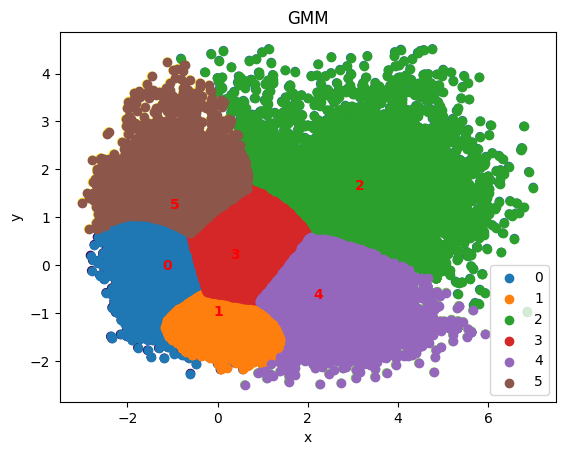

In [258]:
# 2차

# columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

#=========================#
df_gmm = df_gmm_eda[['energy', 'loudness', 'instrumentalness', 'acousticness', 'tempo']]
#=========================#
n = 6
#=========================#

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_gmm)

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

gmm = GaussianMixture(n_components=n, random_state=42)
gmm.fit(df_pca)

cluster_labels = gmm.predict(df_pca)

df_gmm['pca_x'] = df_pca[:, 0]
df_gmm['pca_y'] = df_pca[:, 1]
df_gmm['GMM_cluster'] = cluster_labels

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis')

# 마커 클러스터 표시
for cluster in range(n):
    cluster_points = df_gmm[df_gmm['GMM_cluster'] == cluster]
    plt.scatter(cluster_points['pca_x'], cluster_points['pca_y'], label=str(cluster), cmap='viridis')
    centroid = gmm.means_[cluster]
    plt.annotate(str(cluster), (centroid[0], centroid[1]), fontsize=10, fontweight='bold', color='red')
    
cluster_counts = df_gmm['GMM_cluster'].value_counts()
print(cluster_counts)

score = silhouette_score(df_scaled, cluster_labels)
print(score)
plt.title('GMM')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [259]:
df_gmm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62172 entries, 0 to 120765
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   energy            62172 non-null  float64
 1   loudness          62172 non-null  float64
 2   instrumentalness  62172 non-null  float64
 3   acousticness      62172 non-null  float64
 4   tempo             62172 non-null  float64
 5   pca_x             62172 non-null  float64
 6   pca_y             62172 non-null  float64
 7   GMM_cluster       62172 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 4.3 MB


In [260]:
df_gmm0 = df_gmm[df_gmm['GMM_cluster'] == 0]
df_gmm1 = df_gmm[df_gmm['GMM_cluster'] == 1]
df_gmm2 = df_gmm[df_gmm['GMM_cluster'] == 2]
df_gmm3 = df_gmm[df_gmm['GMM_cluster'] == 3]
df_gmm4 = df_gmm[df_gmm['GMM_cluster'] == 4]
df_gmm5 = df_gmm[df_gmm['GMM_cluster'] == 5]

/tmp/ipykernel_66188/3717620646.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(gmm_plt['pca_x'], gmm_plt['pca_y'], cmap='viridis')


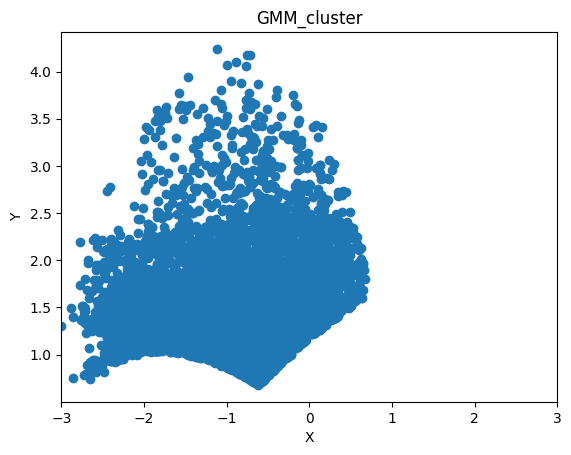

In [261]:
#===================#
gmm_plt = df_gmm5
#===================#

plt.scatter(gmm_plt['pca_x'], gmm_plt['pca_y'], cmap='viridis')
plt.xlim(int(gmm_plt['pca_x'].min()) - 1, int(gmm_plt['pca_x'].max()) + 3)

plt.title('GMM_cluster')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# 랜덤 곡 코사인 유사도 높은 곡 매칭

In [262]:
# 예시 음원
# 오디오정보 + 곡정보 = df
df_sample = df_gmm[['GMM_cluster', 'pca_x', 'pca_y']].sample(1)
df_sample = pd.merge(df_sample, df, left_index=True, right_index=True)
df_sample

,GMM_cluster,pca_x,pca_y,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_id,duration_ms,artist_id,artist_name,track_name,album_image
24936,0,-1.167846,-1.006463,0.772,0.779,-3.932,0.13,0.101,0.0,0.102,0.801,91.987,5HUBNyefP0doewVizrTIFx,220291,2hcsKca6hCfFMwwdbFvenJ,BTOB,"Hello Mello - Min Hyuk Lee, Il Hoon Jung, Peniel",https://i.scdn.co/image/ab67616d00001e02a38bf075ceb1fa4fb87f3d0b


In [263]:
# 기존 데이터에 군집 추가
# 오디오정보 + 곡정보 + 군집정보 = df_cluster

gmm_cluster = df_gmm[['GMM_cluster', 'pca_x', 'pca_y']]
df_cluster = pd.merge(gmm_cluster, df, left_index=True, right_index=True)
df_cluster = df_cluster.reset_index(drop=True)
df_cluster

,GMM_cluster,pca_x,pca_y,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_id,duration_ms,artist_id,artist_name,track_name,album_image
0,0,-2.036282,-0.546695,0.751,0.912,-1.822,0.0391,0.0247,0.000000,0.0778,0.804,108.002,115a4lQhDJGnu4QVSa8bUW,205000,0jVvkFPa6YbFXQ3Qmhita0,SHINHWA,Perfect Man,https://i.scdn.co/image/ab67616d00001e02ac66e2faee193cc64ae8ac84
1,1,-0.606789,-1.019387,0.923,0.688,-3.904,0.2520,0.3100,0.000000,0.0866,0.796,93.931,2UgCRfbt0gafXbUDyMmnqh,256400,6UBA15slIuadJ8h2lPRPos,Tech N9ne,Slacker,https://i.scdn.co/image/ab67616d00001e0264422cb843aa81dc7971f433
2,0,-1.723945,0.813421,0.759,0.866,-3.084,0.2600,0.1800,0.000000,0.9390,0.565,155.945,46t7etd7A3T5K1BDsw9Fjc,285800,6UBA15slIuadJ8h2lPRPos,Tech N9ne,Imma Tell,https://i.scdn.co/image/ab67616d00001e0264422cb843aa81dc7971f433
3,5,-1.686479,1.151440,0.694,0.895,-3.258,0.3350,0.2690,0.000004,0.4000,0.779,167.974,2hnTGEeWAh9UHIjpMsPiFf,298600,6UBA15slIuadJ8h2lPRPos,Tech N9ne,I'm a Playa,https://i.scdn.co/image/ab67616d00001e0264422cb843aa81dc7971f433
4,0,-0.961657,0.438902,0.513,0.671,-5.497,0.0358,0.0765,0.000000,0.0925,0.374,141.901,2R0EAqFQQ60m274ZyNA2Bg,272900,4muJrGMndyYWqZtfk8OWy4,BoA,Every Heart-ミンナノキモチ-,https://i.scdn.co/image/ab67616d00001e022e25a46b0a8ef3131beb0dac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62167,3,1.293946,-0.310487,0.331,0.469,-7.427,0.0399,0.8620,0.026300,0.1660,0.417,119.396,08UnIePBD2U9byIo6ZciZp,308720,19YmizwT6Q0C0K3ZlSLInO,Lyudmila Zykina,Поклонимся великим тем годам,https://i.scdn.co/image/ab67616d00001e022df55fb0f028a005bc364e4a
62168,4,2.166412,0.195872,0.337,0.292,-11.552,0.0369,0.8150,0.000000,0.0846,0.378,137.270,1QaTs83ZOJv6Ggmw1VjQkX,189907,19YmizwT6Q0C0K3ZlSLInO,Lyudmila Zykina,"Не будите, журавли",https://i.scdn.co/image/ab67616d00001e02820bf921810e006dcb07158a
62169,4,3.690752,-1.456356,0.339,0.233,-17.743,0.0380,0.8770,0.000116,0.2100,0.429,75.458,0gU0QUorvpLbAhT8EbpHuS,231253,19YmizwT6Q0C0K3ZlSLInO,Lyudmila Zykina,Зачем меня ты беспокоишь,https://i.scdn.co/image/ab67616d00001e02acaeb103a1937eae6dc05147
62170,4,1.772858,-1.599713,0.508,0.430,-7.490,0.0494,0.9720,0.000010,0.0778,0.684,77.925,3QfCXIFZ7c70ykh0Tq31Mu,155173,19YmizwT6Q0C0K3ZlSLInO,Lyudmila Zykina,Гололедица,https://i.scdn.co/image/ab67616d00001e02acaeb103a1937eae6dc05147


In [264]:
df_cluster.to_csv('/home/ubuntu/project/4.5HZ/추천시스템/df_cluster.csv')

In [265]:
sample_cluster = df_sample['GMM_cluster'].values[0]
sample_cluster

0

In [266]:
df_same_cluster = df_cluster[df_cluster['GMM_cluster'] == sample_cluster]
df_same_cluster.sample(10)

,GMM_cluster,pca_x,pca_y,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_id,duration_ms,artist_id,artist_name,track_name,album_image
15541,0,-1.775982,0.088754,0.731,0.921,-4.345,0.1050,0.026700,0.000000,0.0921,0.757,127.986,51UB8H1fy3CSNq95mWQNJn,208236,1iQfn1B8V25iQoolQakyAZ,NU'EST,Sleep Talking,https://i.scdn.co/image/ab67616d00001e0272cd5a207b7014cc74c8f179
33790,0,-1.872352,0.846129,0.456,0.969,-4.635,0.0886,0.000391,0.096400,0.1120,0.193,144.802,252xDqb6Td8BCFqvX3QmM7,196713,7muzHifhMdnfN1xncRLOqk,Flux Pavilion,24/7,https://i.scdn.co/image/ab67616d00001e021402bea225384389baf3f04a
3840,0,-1.537345,0.163136,0.431,0.785,-4.089,0.0323,0.000029,0.000003,0.1170,0.234,131.850,0UCVX9kwNhKNxT3Xw6W6T5,259600,6jTjjAjvYvMYfaqi837p5x,L'Arc-en-Ciel,MY HEART DRAWS A DREAM,https://i.scdn.co/image/ab67616d00001e021491184ee1abcf5f53d6fafe
3926,0,-1.510605,0.033644,0.903,0.895,-5.745,0.0972,0.008760,0.000000,0.2090,0.572,125.001,1ITq4ElNIU0MXSEVvUN21N,245069,23pnZUOyyTzYzg5GZSvj4Y,JYJ,Mission,https://i.scdn.co/image/ab67616d00001e02252bf8aa31d6f60899487d66
21990,0,-1.878541,0.617798,0.649,0.904,-3.302,0.0436,0.099000,0.000000,0.0788,0.774,147.996,1YHQjT14FV9YyhCruQBF3E,194821,4pz4uzOMpJQyV8UTsDy4H8,ASTRO,Cotton Candy,https://i.scdn.co/image/ab67616d00001e02a4039cc47bb06b9ca8b8d22f
27658,0,-1.019853,-0.553144,0.673,0.750,-5.831,0.0655,0.015500,0.000005,0.3480,0.708,105.848,0uTKGno7UM5vOgdjYHCnYC,114477,0b1sIQumIAsNbqAoIClSpy,j-hope,#ERROR!,https://i.scdn.co/image/ab67616d00001e02e58c1f0d918bea50ad7b2de6
49336,0,-1.827021,-0.874175,0.520,0.973,-3.952,0.0702,0.002850,0.000000,0.3770,0.622,94.078,1v0031VtKGsWfPDkKzGV3s,197993,49bzE5vRBRIota4qeHtQM8,Skillet,You Ain't Ready,https://i.scdn.co/image/ab67616d00001e02d1a0d3883bb1f28d712f7669
36599,0,-0.767726,0.719694,0.683,0.652,-5.811,0.0381,0.145000,0.023400,0.1000,0.722,149.992,2k4WuXHm3dnC7ccWF82cWy,182293,47z7ZrgFoBvVpCnElCE3Zh,Yellow Claw,Amsterdamned,https://i.scdn.co/image/ab67616d00001e022a4f7e877e5755965064961b
55077,0,-0.770861,-0.053903,0.551,0.600,-5.501,0.0295,0.029500,0.000003,0.2910,0.493,125.019,4q4ITrTmB4LyoNw9yjb2Ic,168630,5QNm7E7RU2m64l6Gliu8Oy,HARDY,JACK,https://i.scdn.co/image/ab67616d00001e0227f2230da1986261f618172e
44482,0,-0.707471,-0.142076,0.663,0.583,-5.789,0.2750,0.004720,0.000000,0.1250,0.146,121.678,1D1sFcA13TLiLXmqHUFBXR,316733,5SXuuuRpukkTvsLuUknva1,Baby Keem,range brothers (with Kendrick Lamar),https://i.scdn.co/image/ab67616d00001e02c6b31d9de8df430efab41836


In [267]:
df_sample_vector = df_sample[['pca_x', 'pca_y']].values # 유저가 선택한 음원
df_same_cluster_vector = df_same_cluster[['pca_x', 'pca_y']].values # 같은 군집 내 음원들

In [268]:
cosine_similarities = cosine_similarity(df_sample_vector, df_same_cluster_vector)
similar1 = np.argsort(cosine_similarities, axis=1)[:, ::-1][:, :2]
similar2 = similar1.flatten()
top10 = df_same_cluster.iloc[similar2]

top10['similarity'] = cosine_similarities.flatten()[similar2]
top10['rank'] = np.tile(np.arange(1,3), len(df_sample_vector))

/tmp/ipykernel_66188/251556669.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10['similarity'] = cosine_similarities.flatten()[similar2]
/tmp/ipykernel_66188/251556669.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10['rank'] = np.tile(np.arange(1,3), len(df_sample_vector))


In [269]:
cosine_similarities

array([[0.90087318, 0.40650068, 0.41807054, ..., 0.26606107, 0.6296718 ,
        0.91430238]])

In [270]:
similar1

array([[ 4725, 19189]])

In [271]:
similar2

array([ 4725, 19189])

In [272]:
df_same_cluster

,GMM_cluster,pca_x,pca_y,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_id,duration_ms,artist_id,artist_name,track_name,album_image
0,0,-2.036282,-0.546695,0.751,0.912,-1.822,0.0391,0.02470,0.000000,0.0778,0.804,108.002,115a4lQhDJGnu4QVSa8bUW,205000,0jVvkFPa6YbFXQ3Qmhita0,SHINHWA,Perfect Man,https://i.scdn.co/image/ab67616d00001e02ac66e2faee193cc64ae8ac84
2,0,-1.723945,0.813421,0.759,0.866,-3.084,0.2600,0.18000,0.000000,0.9390,0.565,155.945,46t7etd7A3T5K1BDsw9Fjc,285800,6UBA15slIuadJ8h2lPRPos,Tech N9ne,Imma Tell,https://i.scdn.co/image/ab67616d00001e0264422cb843aa81dc7971f433
4,0,-0.961657,0.438902,0.513,0.671,-5.497,0.0358,0.07650,0.000000,0.0925,0.374,141.901,2R0EAqFQQ60m274ZyNA2Bg,272900,4muJrGMndyYWqZtfk8OWy4,BoA,Every Heart-ミンナノキモチ-,https://i.scdn.co/image/ab67616d00001e022e25a46b0a8ef3131beb0dac
5,0,-0.883440,0.099259,0.794,0.698,-5.613,0.1380,0.11600,0.000000,0.1120,0.495,130.000,3Rw3ap7xrfji6invhvGuJP,387933,6UBA15slIuadJ8h2lPRPos,Tech N9ne,T9x,https://i.scdn.co/image/ab67616d00001e0264422cb843aa81dc7971f433
6,0,-1.302976,-0.668867,0.727,0.840,-4.293,0.0964,0.11400,0.000000,0.0621,0.807,102.993,4RtHEggWfFWknuAsRdkyku,193227,4muJrGMndyYWqZtfk8OWy4,BoA,No.1,https://i.scdn.co/image/ab67616d00001e02e9e1fd55a8798bc0a49fe28c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61902,0,-0.443235,-0.409780,0.588,0.647,-6.973,0.0397,0.12000,0.000049,0.1000,0.777,111.604,7IO9OEbJxqb7VrhYz8nK6g,218652,4kmSUlKf9cg16DexnA97XB,Александр Добронравов,"Не сказать, что люблю",https://i.scdn.co/image/ab67616d00001e02bbbc304cf2e77faa7989a30b
62005,0,-0.613199,-0.691764,0.648,0.695,-4.327,0.0258,0.31300,0.000000,0.1890,0.657,104.961,5DJmCKCL6UKRdgZeScZqsw,250000,2aV270tYypinWWYO16JwJF,Gruppa Express,"Верила, верила, верю",https://i.scdn.co/image/ab67616d00001e02abe3f85d0199faf3bda63fff
62034,0,-1.304477,0.873762,0.526,0.748,-5.477,0.0389,0.03370,0.000000,0.0945,0.381,156.061,1LznXvHZXVhaH3jKtu8KJy,198696,6B9ocOUg3cA75HOCqix6M3,Vika Tsyganova,ЛетоЛето,https://i.scdn.co/image/ab67616d00001e022721d4cbd04a8ae272964abf
62048,0,-0.696808,0.125614,0.526,0.757,-5.574,0.0505,0.32800,0.000027,0.4890,0.269,131.962,2dC4b9HtGh3kSGzFr3rpWT,229766,6B9ocOUg3cA75HOCqix6M3,Vika Tsyganova,Гангстер-танго,https://i.scdn.co/image/ab67616d00001e022721d4cbd04a8ae272964abf


In [273]:
top10

,GMM_cluster,pca_x,pca_y,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_id,duration_ms,artist_id,artist_name,track_name,album_image,similarity,rank
12908,0,-1.167846,-1.006463,0.772,0.779,-3.932,0.1300,0.1010,0.0,0.102,0.801,91.987,5HUBNyefP0doewVizrTIFx,220291,2hcsKca6hCfFMwwdbFvenJ,BTOB,"Hello Mello - Min Hyuk Lee, Il Hoon Jung, Peniel",https://i.scdn.co/image/ab67616d00001e02a38bf075ceb1fa4fb87f3d0b,1.0,1
51655,0,-1.162332,-1.001715,0.609,0.776,-4.695,0.0416,0.0263,0.0,0.167,0.455,90.994,1PILWAtGLdG772MCA51sZ6,194609,3sDbKMebVH2VYcRSl7u1VC,for KING & COUNTRY,What Are We Waiting For? (The Single),https://i.scdn.co/image/ab67616d00001e02a7bba078e2ef1510f7d699f7,1.0,2


In [274]:
top10_short = top10[['rank', 'similarity', 'GMM_cluster']]
top10_short

,rank,similarity,GMM_cluster
12908,1,1.0,0
51655,2,1.0,0


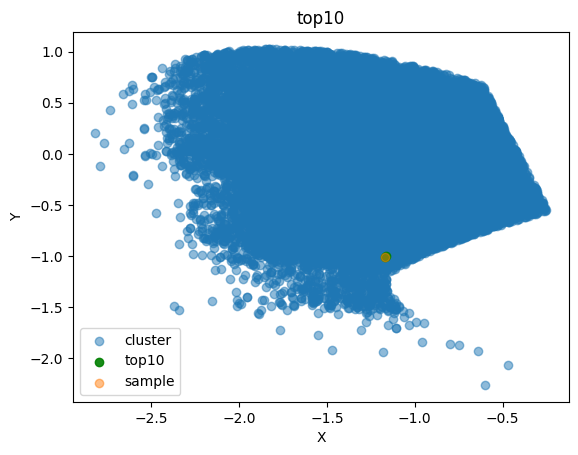

In [275]:
# 코사인 유사도

plt.scatter(df_same_cluster['pca_x'], df_same_cluster['pca_y'], label='cluster', alpha=0.5)
plt.scatter(top10['pca_x'], top10['pca_y'], label='top10', alpha=0.9, marker='o', color='green')
plt.scatter(df_sample['pca_x'], df_sample['pca_y'], label='sample', alpha=0.5)

plt.legend()
plt.title('top10')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# 이전 코드

/home/ubuntu/miniconda3/envs/4.5HZ/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/tmp/ipykernel_20023/750313670.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmean['pca_x'] = pca_transformed[:,0]
/tmp/ipykernel_20023/750313670.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmean['pca_y'] = pca_transformed[:,1]
/tmp/ipykernel_20023/750313670.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

kmeans_cluster
1    17870
3    17599
4    12604
0     5764
5     2479
2     2473
Name: count, dtype: int64
0.24825316132605998


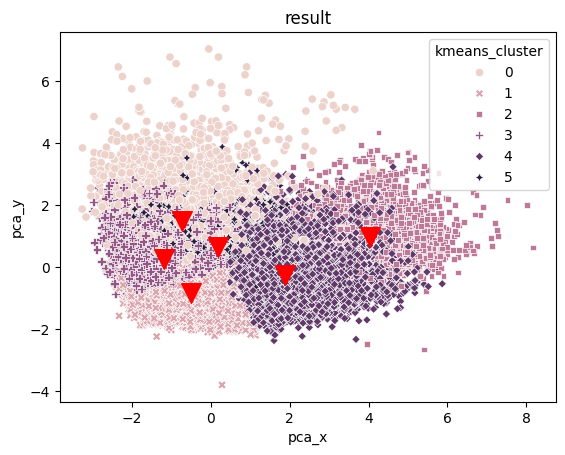

In [135]:
# 1차
# ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

#=========================#
df_kmean = df_eda1[['energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'tempo']]
#=========================#

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_kmean)
kmeans = KMeans(n_clusters=6, init='k-means++')
kmeans.fit(scaled_data)

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(scaled_data)

df_kmean['pca_x'] = pca_transformed[:,0]
df_kmean['pca_y'] = pca_transformed[:,1]
df_kmean['kmeans_cluster'] = kmeans.labels_

sns.scatterplot(x='pca_x', y='pca_y', data=df_kmean, hue='kmeans_cluster', style='kmeans_cluster')
plt.title('result')
score = silhouette_score(scaled_data, kmeans.labels_)
cluster_counts = df_kmean['kmeans_cluster'].value_counts()
print(cluster_counts)

cluster_means = df_kmean.groupby('kmeans_cluster').agg({'pca_x': 'mean', 'pca_y': 'mean'}).reset_index()
plt.scatter(cluster_means['pca_x'], cluster_means['pca_y'], marker='v', s=200, c='red', label='Cluster Centers')

print(score)
plt.show()


In [136]:
df_kmean[df_kmean['pca_x'] > 6].index

Index([ 4942,  5438,  5661,  7101,  8004,  8080,  8348,  8426,  8489,  9606,
        9737,  9791,  9794,  9915, 10044, 10069, 10134, 10310, 10369, 18819,
       18836, 19070, 19215, 19413, 20172, 21646, 21667, 21729, 21800, 21910,
       22014, 22274, 22311, 22449, 22490, 23887, 51740, 52122, 56945, 58703,
       60305],
      dtype='int64')

In [137]:
df_kmean.loc[df_kmean[df_kmean['pca_x'] > 6].index]

,energy,loudness,speechiness,acousticness,instrumentalness,tempo,pca_x,pca_y,kmeans_cluster
4942,0.06560,-23.139,0.0543,0.995,0.91000,103.851,6.013938,1.195712,2
5438,0.05270,-25.999,0.0549,0.974,0.93700,82.148,6.583538,0.805488,2
5661,0.10700,-26.661,0.0396,0.916,0.91600,73.558,6.493798,0.482228,2
7101,0.01770,-24.000,0.1060,0.993,0.94500,57.730,6.471605,0.419270,2
8004,0.00356,-35.490,0.0389,0.994,0.86400,65.757,8.174692,0.641659,2
8080,0.02840,-25.195,0.1100,0.972,0.89500,118.901,6.200537,2.012032,2
8348,0.06540,-24.625,0.0640,0.942,0.90800,122.095,6.036709,1.789904,2
8426,0.03530,-25.023,0.0477,0.951,0.90400,78.039,6.436195,0.573414,2
8489,0.02480,-24.141,0.0788,0.936,0.88200,89.849,6.174720,1.005660,2
9606,0.06850,-25.122,0.0432,0.944,0.94800,116.085,6.214329,1.575869,2


In [138]:
df_kmean[df_kmean['pca_y'] > 4].index

Index([  328,   388,   492,   495,   707,   715,  1473,  2023,  2158,  3018,
       ...
       60347, 60578, 60579, 60583, 60586, 60588, 60595, 60599, 60601, 60607],
      dtype='int64', length=135)

In [139]:
df_kmean.loc[df_kmean[df_kmean['pca_y'] > 4].index]

,energy,loudness,speechiness,acousticness,instrumentalness,tempo,pca_x,pca_y,kmeans_cluster
328,0.432,-16.817,0.938,0.744,0.000000,116.410,1.380760,5.555320,0
388,0.467,-16.051,0.943,0.799,0.000000,111.341,1.289717,5.415808,0
492,0.688,-13.747,0.939,0.764,0.000000,86.731,0.475465,4.608203,0
495,0.437,-17.173,0.949,0.775,0.000000,82.013,1.638745,4.754059,0
707,0.403,-20.633,0.864,0.888,0.000000,107.320,2.408003,5.046477,0
...,...,...,...,...,...,...,...,...,...
60588,0.168,-22.377,0.870,0.749,0.000013,76.984,3.175875,4.422737,0
60595,0.242,-23.556,0.946,0.681,0.000000,92.749,2.867576,5.338606,0
60599,0.198,-24.007,0.933,0.701,0.000000,90.400,3.107319,5.227052,0
60601,0.284,-23.801,0.966,0.681,0.000000,82.017,2.828729,5.189636,0


In [140]:
df_kmean_filter = df_kmean.drop(df_kmean[df_kmean['pca_x'] > 6].index)
df_kmean_filter = df_kmean_filter.drop(df_kmean[df_kmean['pca_y'] > 4].index)
df_kmean_filter = df_kmean_filter.drop(df_kmean[df_kmean['pca_y'] < -2.5].index)

df_kmean_filter

,energy,loudness,speechiness,acousticness,instrumentalness,tempo,pca_x,pca_y,kmeans_cluster
0,0.912,-1.822,0.0391,0.0247,0.000000,108.002,-1.936527,-1.047211,1
2,0.688,-3.904,0.2520,0.3100,0.000000,93.931,-0.822295,0.060287,0
4,0.866,-3.084,0.2600,0.1800,0.000000,155.945,-1.938749,1.631512,0
6,0.895,-3.258,0.3350,0.2690,0.000004,167.974,-2.006352,2.412553,0
8,0.671,-5.497,0.0358,0.0765,0.000000,141.901,-0.879742,0.021468,3
...,...,...,...,...,...,...,...,...,...
61083,0.469,-7.427,0.0399,0.8620,0.026300,119.396,1.342312,-0.349107,4
61084,0.292,-11.552,0.0369,0.8150,0.000000,137.270,2.198164,0.282524,4
61085,0.233,-17.743,0.0380,0.8770,0.000116,75.458,3.694083,-1.005664,4
61086,0.430,-7.490,0.0494,0.9720,0.000010,77.925,1.803811,-1.375746,4


/home/ubuntu/miniconda3/envs/4.5HZ/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/tmp/ipykernel_20023/1163394884.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmean['pca_x'] = pca_transformed[:,0]
/tmp/ipykernel_20023/1163394884.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmean['pca_y'] = pca_transformed[:,1]
/tmp/ipykernel_20023/1163394884.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

kmeans_cluster
0    17915
2    17586
4    10143
1     8108
3     2461
5     2398
Name: count, dtype: int64
0.2749491337624681


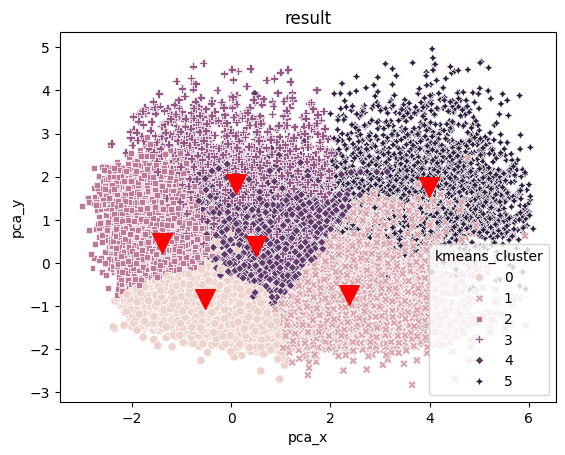

In [146]:
# 2차
#=========================#
df_kmean = df_kmean_filter[['energy', 'loudness', 'acousticness', 'instrumentalness', 'tempo']]
#=========================#

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_kmean)
kmeans = KMeans(n_clusters=6, init='k-means++')
kmeans.fit(scaled_data)

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(scaled_data)

df_kmean['pca_x'] = pca_transformed[:,0]
df_kmean['pca_y'] = pca_transformed[:,1]
df_kmean['kmeans_cluster'] = kmeans.labels_

sns.scatterplot(x='pca_x', y='pca_y', data=df_kmean, hue='kmeans_cluster', style='kmeans_cluster')
plt.title('result')
score = silhouette_score(scaled_data, kmeans.labels_)
cluster_counts = df_kmean['kmeans_cluster'].value_counts()
print(cluster_counts)

cluster_means = df_kmean.groupby('kmeans_cluster').agg({'pca_x': 'mean', 'pca_y': 'mean'}).reset_index()
plt.scatter(cluster_means['pca_x'], cluster_means['pca_y'], marker='v', s=200, c='red', label='Cluster Centers')

print(score)
plt.show()


# GMM

/tmp/ipykernel_20023/79122858.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gmm['pca_x'] = df_pca[:, 0]
/tmp/ipykernel_20023/79122858.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gmm['pca_y'] = df_pca[:, 1]
/tmp/ipykernel_20023/79122858.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

GMM_cluster
0    21401
4    11062
3     9084
1     6830
2     6357
5     3877
Name: count, dtype: int64
0.23488036531326933


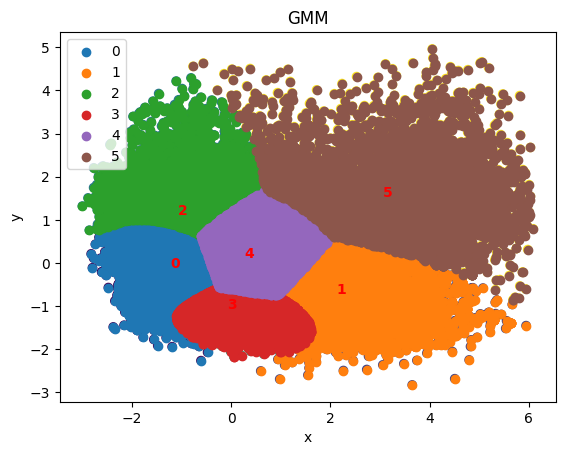

In [150]:
# GMM
# columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

#=========================#
df_gmm = df_kmean_filter[['energy', 'loudness', 'instrumentalness', 'acousticness', 'tempo']]
#=========================#
n = 6
#=========================#

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_gmm)

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

gmm = GaussianMixture(n_components=n, random_state=42)
gmm.fit(df_pca)

cluster_labels = gmm.predict(df_pca)

df_gmm['pca_x'] = df_pca[:, 0]
df_gmm['pca_y'] = df_pca[:, 1]
df_gmm['GMM_cluster'] = cluster_labels

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis')

# 마커 클러스터 표시
for cluster in range(n):
    cluster_points = df_gmm[df_gmm['GMM_cluster'] == cluster]
    plt.scatter(cluster_points['pca_x'], cluster_points['pca_y'], label=str(cluster), cmap='viridis')
    centroid = gmm.means_[cluster]
    plt.annotate(str(cluster), (centroid[0], centroid[1]), fontsize=10, fontweight='bold', color='red')
    
cluster_counts = df_gmm['GMM_cluster'].value_counts()
print(cluster_counts)

score = silhouette_score(df_scaled, cluster_labels)
print(score)
plt.title('GMM')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [151]:
df_gmm0 = df_gmm[df_gmm['GMM_cluster'] == 0]
df_gmm1 = df_gmm[df_gmm['GMM_cluster'] == 1]
df_gmm2 = df_gmm[df_gmm['GMM_cluster'] == 2]
df_gmm3 = df_gmm[df_gmm['GMM_cluster'] == 3]
df_gmm4 = df_gmm[df_gmm['GMM_cluster'] == 4]
df_gmm5 = df_gmm[df_gmm['GMM_cluster'] == 5]

/tmp/ipykernel_20023/1577729303.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(gmm_plt['pca_x'], gmm_plt['pca_y'], cmap='viridis')


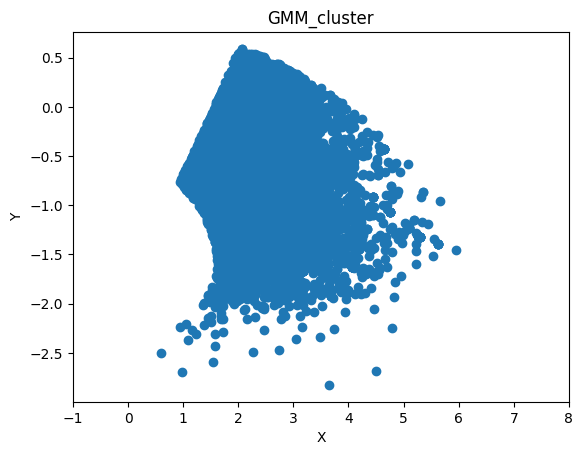

In [152]:
#===================#
gmm_plt = df_gmm1
#===================#

plt.scatter(gmm_plt['pca_x'], gmm_plt['pca_y'], cmap='viridis')
plt.xlim(int(gmm_plt['pca_x'].min()) - 1, int(gmm_plt['pca_x'].max()) + 3)

plt.title('GMM_cluster')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# 필터링
1. 군집 내 코사인 유사도
2. 군집 무관 코사인 유사도

In [155]:
# 예시 음원
# 오디오정보 + 곡정보 = df
df_sample = df_gmm[['GMM_cluster', 'pca_x', 'pca_y']].sample(1)
df_sample = pd.merge(df_sample, df, left_index=True, right_index=True)
df_sample

,GMM_cluster,pca_x,pca_y,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_id,duration_ms,artist_id,artist_name,track_name,release_date,album_image
7866,1,3.535613,-0.707884,0.359,0.166,-15.468,0.0362,0.984,0.000207,0.0983,0.242,104.998,3WBn4AmDXNmvVGylRZnCO5,277147,4FrFdi2hHpulQOxDihRIQD,Aoi Teshima,Young and Beautiful,2018-12-19,https://i.scdn.co/image/ab67616d00001e02e8905408dcd8913f35f2c32f


In [156]:
# 기존 데이터에 군집 추가
# 오디오정보 + 곡정보 + 군집정보 = df_cluster

gmm_cluster = df_gmm[['GMM_cluster', 'pca_x', 'pca_y']]
df_cluster = pd.merge(gmm_cluster, df, left_index=True, right_index=True)
df_cluster.sample(5)

,GMM_cluster,pca_x,pca_y,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_id,duration_ms,artist_id,artist_name,track_name,release_date,album_image
19312,1,2.497117,-1.511070,0.256,0.301,-12.113,0.0457,0.78500,0.000045,0.1210,0.226,77.108,4X0ixQAHUSfFAZwwZygQY5,149187,5Tw6OSRLoU7IHTO8kHGRQr,Rosie Thomas,Fly Little Crow,2022-10-19,https://i.scdn.co/image/ab67616d00001e0222e892146f49efcb91917afa
13334,4,1.167191,0.053160,0.420,0.382,-6.828,0.0391,0.77700,0.000000,0.3390,0.259,135.009,25e2ZuVy7Y7PisPeoStBf4,199283,6MLmtxHkGVuPhYIcMUm1AQ,Lee Hyun,다음이 있을까,2018-02-26,https://i.scdn.co/image/ab67616d00001e026ae8399471fe84324d39eb9c
3311,0,-1.694060,0.159150,0.722,0.895,-4.775,0.0486,0.00217,0.000010,0.1280,0.639,129.981,6Oc3xeUdriwVUjJiOoGZkM,219387,5iRPbkcPmqAFFwDUj6ywVS,2PM,I'll be back - Japanese ver.-,2011-11-30,https://i.scdn.co/image/ab67616d00001e026ead8edd251a0d4b33fdc947
21572,3,0.105593,-0.996636,0.516,0.521,-6.240,0.0320,0.27200,0.000003,0.0859,0.198,94.007,4vPh1nmJ8ReDZ0i9W2GMyI,186533,5nHR37FDSU4I0QQta0AZ1C,Ross Copperman,We Should Plant a Tree,2019-04-19,https://i.scdn.co/image/ab67616d00001e02c6a9b5b2bc46b7805361def8
3003,0,-1.703249,0.538020,0.653,0.883,-1.738,0.0252,0.31700,0.000000,0.2130,0.315,148.037,6YSycxAzLHgevzkF4tBQvR,198213,0Sadg1vgvaPqGTOjxu0N6c,Girls' Generation,Diamond,2011-12-13,https://i.scdn.co/image/ab67616d00001e026a6b86296542432980c9976e


In [157]:
# df_cluster.to_csv('/home/ubuntu/project/4.5HZ/추천시스템/콘텐츠기반필터링/track_cluster.csv', index=False)
# df_o = pd.read_csv('audio_contents.csv')

# 1. 군집 내 코사인 유사도

In [158]:
sample_cluster = df_sample['GMM_cluster'].values[0]
sample_cluster

1

In [159]:
df_same_cluster = df_cluster[df_cluster['GMM_cluster'] == sample_cluster]
df_same_cluster.sample(10)

,GMM_cluster,pca_x,pca_y,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_id,duration_ms,artist_id,artist_name,track_name,release_date,album_image
2745,1,1.329194,-0.974186,0.688,0.413,-7.600,0.0626,0.7340,0.000000,0.3010,0.8690,98.050,1q0pMOx0MpKVzY0X2NSM8r,208449,6a3Mfrn2XBR1DfPg1QGa1d,Standing Egg,Crazy,2015-05-22,https://i.scdn.co/image/ab67616d00001e02b4d84cb084704d7547fdd4cf
34756,1,2.210207,-1.502018,0.369,0.337,-11.194,0.0872,0.7510,0.002160,0.0960,0.2240,77.402,2e4oIsOkGJNQ4Ab9sjOm52,200440,2kQnsbKnIiMahOetwlfcaS,Raveena,Love Overgrown,2022-02-11,https://i.scdn.co/image/ab67616d00001e02d5d3421fa3d280bee4ea97ac
6442,1,2.364178,-1.234020,0.544,0.269,-11.129,0.0299,0.7810,0.000018,0.0839,0.1890,87.812,4rE4pQ40DAhyjps7bhIYBG,265413,3E5NLQpQbd0eJ18XO9zC0h,Seiko Matsuda,瑠璃色の地球,2005-08-26,https://i.scdn.co/image/ab67616d00001e029c64d79068c6cf8a7e97d7a6
41846,1,1.088725,-0.599428,0.512,0.565,-10.558,0.0356,0.4980,0.072100,0.1050,0.4550,99.144,0JCF7zQYaMpFVDmFj7lc9s,314653,5Bcrb5qQMVTEbJ43fdIS4A,Mipso,Starry Eyes / Book of Fools,2023-08-25,https://i.scdn.co/image/ab67616d00001e02dc1ba3257787f7112b7758ff
25798,1,1.706220,-0.423641,0.535,0.296,-12.033,0.0407,0.4150,0.002820,0.0784,0.5730,112.093,2QBSLCDq0YrB3khAoTfmef,92893,2vJObElaIZWYDLpiXiJMo9,Cornelius,Toner,2006-10-25,https://i.scdn.co/image/ab67616d00001e029bb81ababd28277b4c7855d4
57802,1,1.922002,-1.367531,0.241,0.474,-9.699,0.0434,0.9450,0.000011,0.1110,0.1430,83.640,59ihIJmXyEBZRd8dN8SXVz,319660,639hqkrgajCYpYjP8cASKU,Vladimir Nechaev,Вечер на рейде,2022-05-06,https://i.scdn.co/image/ab67616d00001e02537305144a5cb83f2804bcc6
15457,1,1.316530,-0.430752,0.688,0.293,-11.337,0.0462,0.0153,0.222000,0.1100,0.1240,90.028,0XZJGlqNEZzTMrMlLgdSOi,69851,2FLqlgckDKdmpBrvLAT5BM,Eric Nam,Travel (Prologue),2013-01-23,https://i.scdn.co/image/ab67616d00001e02dd99afa084c23bcdf6e8c76d
37113,1,2.742032,-1.281614,0.204,0.231,-12.691,0.0304,0.7980,0.001030,0.1700,0.1130,85.271,3HTRUt2T56cPflC76Wrr0h,182698,0iOVhN3tnSvgDbcg25JoJb,Etta James,At Last,2019-01-16,https://i.scdn.co/image/ab67616d00001e026e27cc55c8963cd75a89bda6
4498,1,2.671654,0.158034,0.442,0.252,-12.627,0.0280,0.9500,0.005260,0.0956,0.0892,135.935,5nZD9ZVKtxyLWQPP2V2JOV,238413,7LyaQJxH634U3S8Xu6DDrK,Misty Blue,지상에서의 마지막 연인,2009-11-18,https://i.scdn.co/image/ab67616d00001e0285ebe9421e49ed3f3ff2f9b0
13746,1,2.711120,-0.025112,0.481,0.190,-12.130,0.0383,0.9130,0.000000,0.1000,0.2560,130.738,4zgZ7dq1BcrhmLRA8bPF4c,315813,3zYyfrb4r6ZHI5Di0rB9bV,Kim Dong Ryul,Old Song,2008-01-24,https://i.scdn.co/image/ab67616d00001e02b803d56ec6afab602ecde4f7


In [160]:
df_sample_vector = df_sample[['pca_x', 'pca_y']].values # 유저가 선택한 음원
df_same_cluster_vector = df_same_cluster[['pca_x', 'pca_y']].values # 같은 군집 내 음원들

In [161]:
cosine_similarities = cosine_similarity(df_sample_vector, df_same_cluster_vector)
similar1 = np.argsort(cosine_similarities[:, ::-1])[:, :10]
similar2 = similar1.flatten()
top10 = df_same_cluster.iloc[similar2]

In [162]:
top10

,GMM_cluster,pca_x,pca_y,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_id,duration_ms,artist_id,artist_name,track_name,release_date,album_image
21590,1,2.278121,-0.833773,0.640,0.307,-13.009,0.0377,0.606,0.040900,0.2450,0.414,94.941,7jUOnMGzrCkkLjhfMZzCSC,174626,511vWnluvbgTL9TDgqlwVZ,Edward Ong,I'm Lonely (Acoustic Instrumental),2019-09-30,https://i.scdn.co/image/ab67616d00001e02c3ad41965abf90f1fd4735f3
24949,1,1.887097,0.362728,0.421,0.318,-10.227,0.0392,0.827,0.000780,0.1420,0.596,143.898,5Lq074Quhi31m1WFGg26mw,213100,3UsQ4XdEqcQ1PoUI1wV0Lb,Kahimi Karie,Habanera,2003-02-21,https://i.scdn.co/image/ab67616d00001e02461ff6ff15de0f4245ae6f02
20597,1,1.665865,-0.616614,0.412,0.473,-6.983,0.0262,0.763,0.368000,0.2060,0.237,77.918,3SLlqKXr91haZQhhNYNuVk,271000,6WeDO4GynFmK4OxwkBzMW8,The Black Skirts,Who Do You Love,2017-05-30,https://i.scdn.co/image/ab67616d00001e0210b3ebc65d2f65964cf461d8
60681,1,2.703146,-0.171978,0.741,0.247,-13.807,0.0832,0.815,0.000000,0.0762,0.662,123.026,6OUcj8IOlAH5lOIDPkEWXR,162040,6tcdpQn32WlzB81qhAZxDB,Vladimir Troshin,Песня военных корреспондентов,2020-04-10,https://i.scdn.co/image/ab67616d00001e02405bf8552f277ef35c0b23b1
60102,1,2.944896,-1.746429,0.496,0.288,-12.317,0.0407,0.994,0.001930,0.4460,0.680,70.234,1AaKdU2unss6QzR64kDTsX,148766,4J4SBCamvIdEsG9VhCbRCo,Владимир Бунчиков,В любимом Бухаресте - 2022 Remastered,2023-01-18,https://i.scdn.co/image/ab67616d00001e02ab3ab90e7bf6fa108a72452c
55013,1,1.640234,-1.009947,0.582,0.416,-9.865,0.0285,0.706,0.000020,0.1190,0.241,94.731,7M8DVGyQ6VmOmaUo7M3LMs,242510,2ErsJAz6qJ5cqjoVAvfvaC,Charles Wesley Godwin,Temporary Town,2021-11-05,https://i.scdn.co/image/ab67616d00001e02cacc394e4339f6bc1e7a477c
23880,1,2.894100,-1.212374,0.647,0.215,-12.870,0.0387,0.859,0.000000,0.2880,0.617,88.218,0pXzUDxuD3DvVNYILK8MjE,183403,6cpVjPOo5Ozn28hUfYBXqm,Jonah Baker,Beautiful Mistakes - Acoustic,2021-04-23,https://i.scdn.co/image/ab67616d00001e022a3672e89653480c1bc178e4
54798,1,1.386189,-0.437820,0.777,0.465,-10.550,0.0501,0.621,0.000000,0.0932,0.757,113.003,14QUJhbXCWO90NfZ0mXnGG,179363,7cq0a4di5dOeKU8sicemd1,young friend,PINCH ME,2021-03-04,https://i.scdn.co/image/ab67616d00001e02c3296db951e155a6a8699e17
396,1,2.377508,-1.678265,0.366,0.350,-11.252,0.0407,0.851,0.000114,0.2780,0.107,72.017,7o78H490MXMz2QlL4Pf268,59600,0w4e7HVbqAHFPN6VkIlvhe,Suresh Wadkar,Dhampatya Sukh Praptartya Mantra,2002,https://i.scdn.co/image/ab67616d00001e02a4b8ef575485c224d74e8b96
17312,1,1.182627,-0.876653,0.772,0.434,-7.511,0.0366,0.695,0.000005,0.3480,0.572,101.036,2FGzF2PbvvVjMQQWtCuusA,253867,1mORehSVEd7lcaT2d7Sl2K,SURAN,Step Step,2016-09-08,https://i.scdn.co/image/ab67616d00001e02855ba48af2bc455d1abba99f


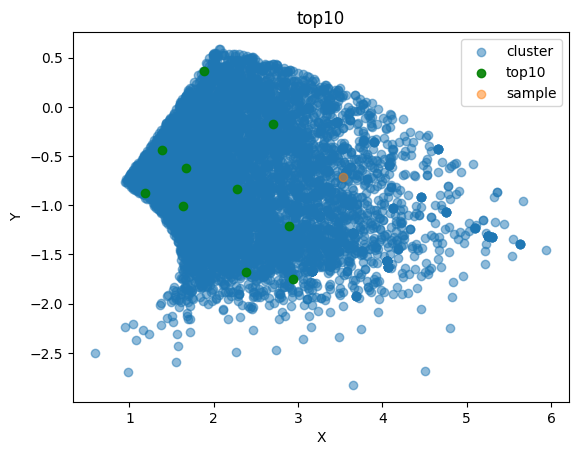

In [163]:
# 코사인 유사도

plt.scatter(df_same_cluster['pca_x'], df_same_cluster['pca_y'], label='cluster', alpha=0.5)
plt.scatter(top10['pca_x'], top10['pca_y'], label='top10', alpha=0.9, marker='o', color='green')
plt.scatter(df_sample['pca_x'], df_sample['pca_y'], label='sample', alpha=0.5)

plt.legend()
plt.title('top10')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# 1. 유클라디안 거리
- (코사인을 사용하기로)

In [164]:
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x-y)**2))

distances = np.sqrt(np.sum((df_same_cluster[['pca_x', 'pca_y']].values - df_sample[['pca_x', 'pca_y']].values)**2, axis=1))

similar_eu = distances.argsort()[:50]
top10 = df_same_cluster.iloc[similar_eu]
top10.head()

,GMM_cluster,pca_x,pca_y,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_id,duration_ms,artist_id,artist_name,track_name,release_date,album_image
7866,1,3.535613,-0.707884,0.359,0.1660,-15.468,0.0362,0.984,0.000207,0.0983,0.2420,104.998,3WBn4AmDXNmvVGylRZnCO5,277147,4FrFdi2hHpulQOxDihRIQD,Aoi Teshima,Young and Beautiful,2018-12-19,https://i.scdn.co/image/ab67616d00001e02e8905408dcd8913f35f2c32f
60416,1,3.530960,-0.701344,0.467,0.2300,-16.419,0.0725,0.987,0.000000,0.5450,0.5240,103.903,6fgMpnlMaGCgZCHNMUfn3g,178213,6tcdpQn32WlzB81qhAZxDB,Vladimir Troshin,Свежий ветерок,2023-04-01,https://i.scdn.co/image/ab67616d00001e021abe13809844f74633c01fe5
24452,1,3.523595,-0.715854,0.432,0.1160,-14.222,0.0345,0.952,0.068500,0.1490,0.0814,99.887,1OcX5myU73VFwUAanEvnnb,221031,5oU0tZlItLctcLOQPS3mCy,Priscilla Ahn,You Make The World A Better Place,2021-01-29,https://i.scdn.co/image/ab67616d00001e022332f5e1f87e861cbeea1385
19693,1,3.524215,-0.725726,0.492,0.1790,-15.960,0.0424,0.947,0.000000,0.1230,0.1820,103.606,6a8vt3DULkInboV43feS5I,247880,57htMBtzpppc1yoXgjbslj,Park Hyo Shin,"1991年, 찬바람이 불던 밤…",2007-01-29,https://i.scdn.co/image/ab67616d00001e0264a3d3330efb392beae949aa
10442,1,3.513499,-0.723523,0.671,0.0704,-14.277,0.0322,0.939,0.000000,0.1240,0.6270,105.993,2vnvyFpp8ibNnXGzWEkdms,149448,1tTQcokfKcsCxZaHF2pIhw,Bailey Rushlow,Don't Worry Baby - Acoustic,2020-01-20,https://i.scdn.co/image/ab67616d00001e0240be209c20ef85b3cbb2c941


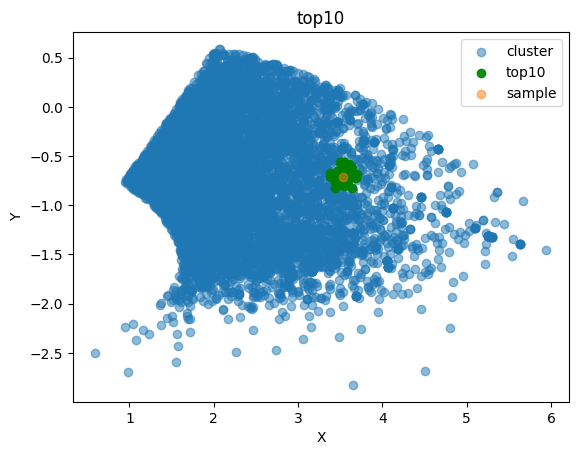

In [165]:
# 유클라디안 거리

plt.scatter(df_same_cluster['pca_x'], df_same_cluster['pca_y'], label='cluster', alpha=0.5)
plt.scatter(top10['pca_x'], top10['pca_y'], label='top10', alpha=0.9, marker='o', color='green')
plt.scatter(df_sample['pca_x'], df_sample['pca_y'], label='sample', alpha=0.5)

plt.legend()
plt.title('top10')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [166]:
top10.sample(10)

,GMM_cluster,pca_x,pca_y,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_id,duration_ms,artist_id,artist_name,track_name,release_date,album_image
60546,1,3.568201,-0.666634,0.338,0.2750,-17.881,0.0565,0.940,0.000000,0.7130,0.184,103.164,3McdfaA8gOhrMqpKxHBQN7,219893,1A6JXyIYY4ZhWxdLTLt3kR,Feodor Chaliapin,Вниз по матушке по Волге,2023-10-06,https://i.scdn.co/image/ab67616d00001e020319d716b9e6f36aa7215d96
23816,1,3.437588,-0.823218,0.307,0.0818,-13.694,0.0351,0.955,0.000138,0.1400,0.135,102.999,7vUjxwLHCqRWfOX3sAO0Gd,187573,2vm8GdHyrJh2O2MfbQFYG0,Ingrid Michaelson,Auld Lang Syne,2021-11-05,https://i.scdn.co/image/ab67616d00001e02d9069ce43a35b7ae81ab8827
58211,1,3.568201,-0.666634,0.338,0.2750,-17.881,0.0565,0.940,0.000000,0.7130,0.184,103.164,3hLEK7isCRROUF2sOTrJTj,219893,1A6JXyIYY4ZhWxdLTLt3kR,Feodor Chaliapin,Вниз по матушке по Волге,2022-08-25,https://i.scdn.co/image/ab67616d00001e0254de51a29410851af8f1ee7e
57995,1,3.505954,-0.787673,0.292,0.2180,-15.970,0.0377,0.987,0.000326,0.0800,0.229,101.347,0ddJKtZ2UtCb2vKRpJ5fE1,184000,1RsJXxwObVjgTgT5YLQsJE,Sergei Lemeshev,Баркетта,2022-08-25,https://i.scdn.co/image/ab67616d00001e02617cbb674ff9d596075567a6
57248,1,3.373162,-0.715364,0.459,0.1540,-14.961,0.0478,0.914,0.000000,0.0620,0.177,104.768,4gdg89OdwphRpnWnfRiTIT,189307,2MzavRjaUsMvWgLAYPyWhL,Oleg Pogudin,Очи чёрные,2021-06-20,https://i.scdn.co/image/ab67616d00001e02e22537385e6a17d456bd0344
60416,1,3.530960,-0.701344,0.467,0.2300,-16.419,0.0725,0.987,0.000000,0.5450,0.524,103.903,6fgMpnlMaGCgZCHNMUfn3g,178213,6tcdpQn32WlzB81qhAZxDB,Vladimir Troshin,Свежий ветерок,2023-04-01,https://i.scdn.co/image/ab67616d00001e021abe13809844f74633c01fe5
58265,1,3.601761,-0.582530,0.348,0.1770,-16.636,0.0333,0.942,0.000032,0.1890,0.201,108.016,1jPlje7F8MQWNc0Xew63GP,175714,0XKmwWopgZOC96M1nBgd7y,Maya Kristalinskaya,Нежность,2022-08-16,https://i.scdn.co/image/ab67616d00001e024d2d893a13f2d06785e2d916
7866,1,3.535613,-0.707884,0.359,0.1660,-15.468,0.0362,0.984,0.000207,0.0983,0.242,104.998,3WBn4AmDXNmvVGylRZnCO5,277147,4FrFdi2hHpulQOxDihRIQD,Aoi Teshima,Young and Beautiful,2018-12-19,https://i.scdn.co/image/ab67616d00001e02e8905408dcd8913f35f2c32f
60497,1,3.568201,-0.666634,0.338,0.2750,-17.881,0.0565,0.940,0.000000,0.7130,0.184,103.164,6GKlA1a9Xa5Yf8e7is4ClX,219893,1A6JXyIYY4ZhWxdLTLt3kR,Feodor Chaliapin,Вниз по матушке по Волге,2023-08-03,https://i.scdn.co/image/ab67616d00001e023dcb1fbdb788ca1b3b5ee2a5
21907,1,3.585817,-0.745387,0.421,0.1070,-15.191,0.0335,0.948,0.000000,0.0881,0.118,104.218,2VVWWwQ3FiWnmbukTb6Kd3,216841,38SWPOPO1YqxUPnT4AAoID,The Mayries,I Will Wait,2019-06-14,https://i.scdn.co/image/ab67616d00001e0229cae5496d1275e956b67e1f
